In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt

Using TensorFlow backend.


In [10]:
#dateparse = lambda x: pd.datetime.strptime(x, '%M-%Y')
#data = pd.read_csv("C:/Users/Tsenguunn/Documents/Kaggle/gold_price_time_series_monthly.csv", parse_dates=['Date'], date_parser=dateparse)
#data.set_index('Date', inplace=True)



In [2]:
data = pd.read_csv("C:/Users/Tsenguunn/Documents/Kaggle/gold_price_time_series_monthly.csv", delimiter=',')


In [3]:
data['Date'][0:132]

0      Jan-90
1      Feb-90
2      Mar-90
3      Apr-90
4      May-90
        ...  
127    Aug-00
128    Sep-00
129    Oct-00
130    Nov-00
131    Dec-00
Name: Date, Length: 132, dtype: object

In [4]:
dt_3 = data['Date'][0:132].str.slice(stop=3).astype(str)

def str_to_num_month(arg):
    switcher = {
        "Jan": 1,
        "Feb": 2, 
        "Mar": 3,
        "Apr": 4,
        "May": 5,
        "Jun": 6,
        "Jul": 7,
        "Aug": 8,
        "Sep": 9,
        "Oct": 10,
        "Nov": 11,
        "Dec": 12,
    }
    return switcher.get(arg, "Wrong month input!")

for i, st in dt_3.items():
    dt_3[i] = str_to_num_month(dt_3[i])



In [6]:
dt_l_2 = data['Date'][0:132].str.slice(start=-2).astype(str).astype(int)

for  i, st in dt_l_2.items():
    if int(st) == 0:
        dt_l_2[i] = 2000
    else:
        dt_l_2[i] = int(st)+1900

In [7]:
import datetime

date_f = ['']*360

for i in range(len(dt_l_2)):
    date_f[i] = datetime.date( year=pd.to_numeric( dt_l_2[i] ), month=pd.to_numeric( dt_3[i] ), day=1 )


print(date_f[131])




2000-12-01


In [8]:
print( range(len(dt_l_2)) )

range(0, 132)


In [9]:
dt_sec_2 = data['Date'][132:].str.slice(stop=2).astype(int)+2000

#dt_sec_2

In [11]:
dt_sec_l_3 = data['Date'][132:].str.slice(start=-3).astype(str)

for i, st in dt_sec_l_3.items():
    dt_sec_l_3[i] = str_to_num_month(dt_sec_l_3[i])

#dt_sec_l_3
    

In [12]:
for i in range(len(dt_l_2), len(dt_l_2)+len(dt_sec_l_3)):
    date_f[i] = datetime.date( year=pd.to_numeric( dt_sec_2[i] ), month=pd.to_numeric( dt_sec_l_3[i] ), day=1 )
    
    

In [14]:
data['Date'] = date_f
data.set_index('Date', inplace=True)


In [15]:
pd.set_option('display.max_rows', None)
data

,Price,Change
Date,,
1990-01-01,410.11,-
1990-02-01,416.81,0.0163
1990-03-01,393.06,-0.057
1990-04-01,374.24,-0.0479
1990-05-01,369.05,-0.0139
1990-06-01,352.33,-0.0453
1990-07-01,362.53,0.029
1990-08-01,394.73,0.0888
1990-09-01,389.32,-0.0137


<b> I analyze the monthly Gold Price time series data between 1990 and 2020 using the Recurrent Neural Network model. We can see that there is a clear time trend in the Gold Price. Specifically, between 2000 and 2011, there was a steep increasing time trend in the Gold Price. </b>

C:\Users\Tsenguunn\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


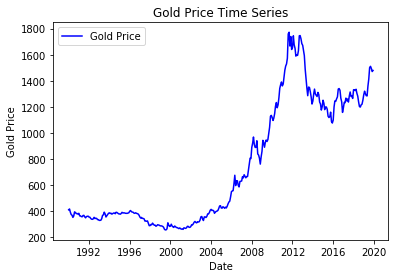

In [16]:
plt.plot( pd.to_numeric( data['Price'] ), color='blue',label='Gold Price')
plt.title('Gold Price Time Series')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

<b> However, if we look at the percentage change in the Gold Price, it looks more like white noise.  </b>

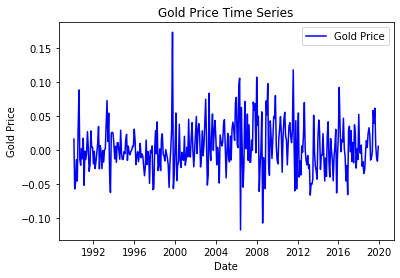

In [17]:
plt.plot( pd.to_numeric( data[1:]['Change'] ), color='blue',label='Gold Price')
plt.title('Gold Price Time Series')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [18]:
data.iloc[:,0].values

array([ 410.11,  416.81,  393.06,  374.24,  369.05,  352.33,  362.53,
        394.73,  389.32,  380.74,  381.73,  376.95,  383.64,  363.83,
        363.34,  358.38,  356.95,  366.72,  367.69,  356.31,  348.74,
        358.69,  360.17,  361.73,  354.45,  353.91,  344.34,  338.62,
        337.24,  340.81,  352.72,  343.06,  345.43,  344.38,  335.02,
        334.82,  329.01,  329.31,  330.08,  342.15,  367.18,  371.89,
        392.19,  378.84,  355.28,  364.18,  373.83,  383.3 ,  386.88,
        381.91,  384.13,  377.27,  381.43,  385.64,  385.49,  380.36,
        391.58,  389.77,  384.39,  379.29,  378.55,  376.64,  382.12,
        391.03,  385.22,  387.56,  386.23,  383.67,  383.06,  383.14,
        385.31,  387.44,  399.45,  404.76,  396.21,  392.85,  391.93,
        385.27,  383.47,  387.35,  383.14,  381.07,  377.85,  369.  ,
        355.11,  346.58,  351.81,  344.47,  343.84,  340.76,  324.1 ,
        324.01,  322.82,  324.87,  306.04,  288.74,  289.1 ,  297.49,
        295.94,  308

In [19]:
train_end_date = pd.to_datetime("2012-06-01").date()
test_start_date = pd.to_datetime("2012-07-01").date()

train_set = data[:train_end_date].iloc[:,0].values

test_set = data[test_start_date:].iloc[:,0].values

train_set = train_set.reshape(-1, 1)
test_set = test_set.reshape(-1, 1)



<b> I separate dataset into training part and test part. Dataset till 2012 June is used as the training dataset. Dataset after that period is used as the test dataset.  </b>

In [20]:
tr_set_len = len( train_set )
tr_set_len

270

In [242]:
#train_set

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
train_set_sc = sc.fit_transform(train_set)

x_train = []
y_train = []

for i in range(16, tr_set_len):
    x_train.append(train_set_sc[i-16:i,0])
    y_train.append(train_set_sc[i,0])

    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape( x_train, ( x_train.shape[0], x_train.shape[1], 1 ) )



In [22]:
def return_rmse(test,pred):
    rmse = sqrt(mean_squared_error(test, pred))
    print("The root mean squared error is {}.".format(rmse))
    
def plot_pred(test,pred):
    plt.plot(test, color='red',label='Realized Gold Price')
    plt.plot(pred, color='blue',label='Predicted Gold Price')
    plt.title('Gold Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Gold Price')
    plt.legend()
    plt.show()
    
from keras.layers import Flatten


In [23]:
regressor = Sequential()

regressor.add( LSTM(units=40, return_sequences=True, input_shape=( x_train.shape[1],1 ), dropout=0.2 ) ) 
#regressor.add(Dropout(0.2))
regressor.add( LSTM(units=40, return_sequences=True, dropout=0.2) )
#regressor.add(Dropout(0.2))
regressor.add( LSTM(units=40, return_sequences=True, dropout=0.2) )
#regressor.add(Dropout(0.2))
regressor.add( LSTM(units=40, return_sequences=True, dropout=0.2) )

regressor.add(Flatten())
regressor.add(Dense(units=1))
regressor.compile(optimizer='rmsprop', loss="mean_squared_error")
regressor.fit(x_train, y_train, epochs=15, batch_size=16)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/15





254/254 [==============================] - 11s 43ms/step - loss: 0.0329
Epoch 2/15
254/254 [==============================] - 1s 4ms/step - loss: 0.0171
Epoch 3/15
254/254 [==============================] - 1s 5ms/step - loss: 0.0249
Epoch 4/15
254/254 [==============================] - 1s 4ms/step - loss: 0.0237
Epoch 5/15
254/254 [==============================] - 1s 4ms/step - loss: 0.0202
Epoch 6/15
254/254 [==============================] - 1s 5ms/step - loss: 0.0220
Epoch 7/15
254/254 [==============================] - 1s 4ms/step - loss: 0.0152
Epoch 8/15
254/254 [==============================] - 1s 5ms/step - loss: 0.0243
Epoch 9/15
254/254 [==============================] - 1s 4ms/step - loss: 0.0339
Epoch 10/15
254/254 [==========================

In [26]:
dt = data['Price']
inp = dt[ len(dt)-len(test_set)-16: ].values
inp = inp.reshape(-1,1)
inp = sc.transform(inp)
inp.shape

(106, 1)

In [250]:
#dt[ len(dt)-len(test_set)-6: ]

In [30]:
x_test = []
for i in range(16,len(inp)):
    x_test.append(inp[i-16:i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

pred_gold = regressor.predict(x_test)
pred_gold = sc.inverse_transform(pred_gold)

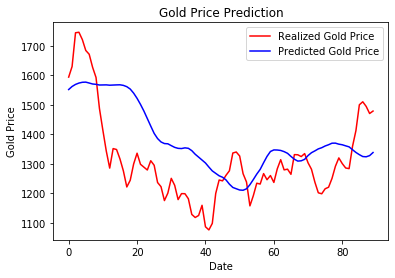

The root mean squared error is 144.0186537942338.


In [31]:
plot_pred(test_set,pred_gold)
return_rmse(test_set,pred_gold)

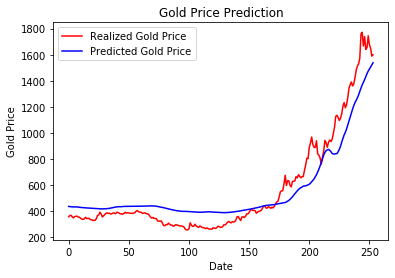

In [32]:
trnd_gold = regressor.predict(x_train)
trnd_gold = sc.inverse_transform(trnd_gold)
y_tr_sc = sc.inverse_transform(y_train.reshape(-1,1))

plot_pred( y_tr_sc, trnd_gold )

In [33]:
from keras.layers import GRU
from keras.optimizers import SGD

In [35]:
regressorGRU = Sequential()
regressorGRU.add( GRU( units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh', dropout=0.2 ) )
regressorGRU.add( GRU( units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh', dropout=0.2 ) )
regressorGRU.add( GRU( units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh', dropout=0.2 ) )

regressorGRU.add( GRU(units=50, activation='tanh', dropout=0.2 ) )

#regressorGRU.add(Flatten())
regressorGRU.add(Dense(units=1))

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

regressorGRU.fit(x_train,y_train,epochs=15,batch_size=16)

Epoch 1/15
254/254 [==============================] - 6s 24ms/step - loss: 0.0694
Epoch 2/15
254/254 [==============================] - 1s 3ms/step - loss: 0.0484
Epoch 3/15
254/254 [==============================] - 1s 3ms/step - loss: 0.0284
Epoch 4/15
254/254 [==============================] - 1s 4ms/step - loss: 0.0257A: 0s - lo - ETA: 0s - loss: 0.
Epoch 5/15
254/254 [==============================] - 1s 4ms/step - loss: 0.0208
Epoch 6/15
254/254 [==============================] - 1s 4ms/step - loss: 0.0200
Epoch 7/15
254/254 [==============================] - 1s 3ms/step - loss: 0.0269
Epoch 8/15
254/254 [==============================] - 1s 3ms/step - loss: 0.0304
Epoch 9/15
254/254 [==============================] - 1s 3ms/step - loss: 0.0247
Epoch 10/15
254/254 [==============================] - 1s 3ms/step - loss: 0.0231
Epoch 11/15
254/254 [==============================] - 1s 3ms/step - loss: 0.0278
Epoch 12/15
254/254 [==============================] - 1s 3ms/step - loss: 

In [36]:
pred_gold_gru = regressorGRU.predict(x_test)
pred_gold_gru = sc.inverse_transform(pred_gold_gru)

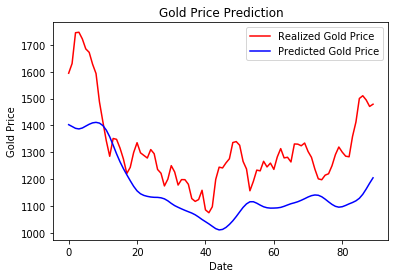

In [37]:
plot_pred(test_set,pred_gold_gru)

<b> <font size="4"> We can see the GRU and LSTM Recurrent Neural Network models are not performing well. One way to improve the prediction is to separate the time trend from the time series data. Time trend can be estimated using the training dataset. Therefore, it will not violate the rule that test dataset can't be used for the model estimation. Also, another nice thing is that we can add time trend once after estimating the model without the time trend. </font> </b>

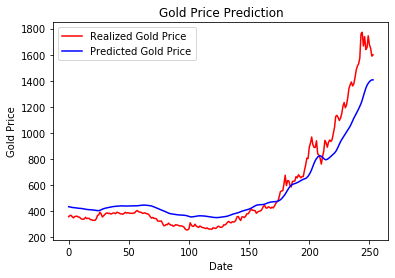

In [38]:
trnd_gold_gru = regressorGRU.predict(x_train)
trnd_gold_gru = sc.inverse_transform(trnd_gold_gru)
y_tr_sc = sc.inverse_transform(y_train.reshape(-1,1))

plot_pred( y_tr_sc, trnd_gold_gru )

In [39]:
x_train_tre = train_set

len(x_train_tre)

np.ones([len(x_train_tre),1])
x_tre_mat = np.concatenate( ( np.ones([len(x_train_tre),1]), np.arange(len(x_train_tre)).reshape(-1,1) ), axis=1 )
time_ols = ( np.linalg.inv( x_tre_mat.transpose().dot(x_tre_mat) ) ).dot( x_tre_mat.transpose().dot(x_train_tre) )

#np.arange(len(x_train_tre))



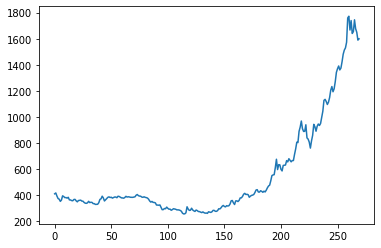

In [40]:
plt.plot(x_train_tre)

(270,)

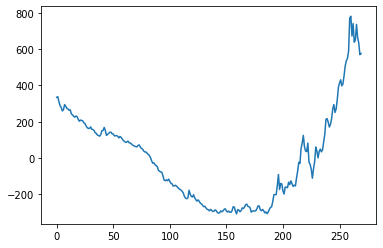

In [41]:
time_trend = time_ols[0]+np.arange(len(x_train_tre))*time_ols[1]

x_train_tre_tt = np.subtract( x_train_tre, time_trend.reshape(-1,1) )

x_train_tre_tt = x_train_tre_tt.reshape(-1,1)
plt.plot(x_train_tre_tt)
#plt.plot(time_trend)
x_train_tre.shape
time_trend.shape


<b> <font size="4"> After removing the time trend, the training datset looks like above. </font> </b>

In [44]:
len(dt)-len(test_set)

270

In [45]:
from sklearn.preprocessing import StandardScaler

sc_tre = StandardScaler()

x_train_tre = x_train_tre.reshape(-1, 1)

#np.ones(len(x_train_tre),1)

#x_train_tre_tt = x_train_tre-time_trend

train_set_tre_sc = sc_tre.fit_transform( x_train_tre_tt.reshape(-1,1) )

#plt.plot(train_set_sc)

x_train_trend = []
y_train_trend = []

for i in range(16, 270):
    x_train_trend.append(train_set_tre_sc[i-16:i,0])
    y_train_trend.append(train_set_tre_sc[i,0])
    
x_train_trend, y_train_trend = np.array(x_train_trend), np.array(y_train_trend)

x_train_trend = np.reshape( x_train_trend, ( x_train_trend.shape[0], x_train_trend.shape[1], 1 ) )



In [70]:
regressorGRU_tre = Sequential()
regressorGRU_tre.add( GRU( units=150, return_sequences=True, input_shape=(x_train_trend.shape[1],1), activation='tanh', dropout=0.2 ) )
regressorGRU_tre.add( GRU( units=150, return_sequences=True, input_shape=(x_train_trend.shape[1],1), activation='tanh', dropout=0.2 ) )
regressorGRU_tre.add( GRU( units=150, return_sequences=True, input_shape=(x_train_trend.shape[1],1), activation='tanh', dropout=0.2 ) )

#regressorGRU_tre.add( GRU( units=250, return_sequences=True, input_shape=(x_train_trend.shape[1],1), activation='tanh', dropout=0.2 ) )
#regressorGRU_tre.add( GRU( units=250, return_sequences=True, input_shape=(x_train_trend.shape[1],1), activation='tanh', dropout=0.2 ) )

regressorGRU_tre.add( GRU(units=150, activation='tanh', dropout=0.2 ) )

regressorGRU_tre.add(Dense(units=1))

regressorGRU_tre.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

regressorGRU_tre.fit(x_train_trend, y_train_trend, epochs=15, batch_size=16)

Epoch 1/15
254/254 [==============================] - 10s 40ms/step - loss: 0.4812
Epoch 2/15
254/254 [==============================] - 2s 7ms/step - loss: 0.2027
Epoch 3/15
254/254 [==============================] - 2s 6ms/step - loss: 0.2594
Epoch 4/15
254/254 [==============================] - 2s 9ms/step - loss: 0.1893
Epoch 5/15
254/254 [==============================] - 2s 6ms/step - loss: 0.2659
Epoch 6/15
254/254 [==============================] - 2s 7ms/step - loss: 0.2719
Epoch 7/15
254/254 [==============================] - 2s 6ms/step - loss: 0.2176
Epoch 8/15
254/254 [==============================] - 2s 6ms/step - loss: 0.2708
Epoch 9/15
254/254 [==============================] - 2s 6ms/step - loss: 0.2376
Epoch 10/15
254/254 [==============================] - 2s 6ms/step - loss: 0.2088
Epoch 11/15
254/254 [==============================] - 2s 6ms/step - loss: 0.3148
Epoch 12/15
254/254 [==============================] - 2s 6ms/step - loss: 0.1813
Epoch 13/15
254/254 [==

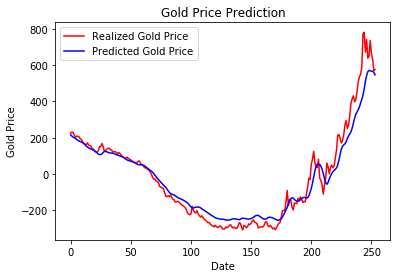

In [71]:
trnd_djia_gru_tre = regressorGRU_tre.predict(x_train_trend)
trnd_djia_gru_tre = sc_tre.inverse_transform(trnd_djia_gru_tre)
y_tr_sc_tre = sc_tre.inverse_transform(y_train_trend.reshape(-1,1))
plot_pred( y_tr_sc_tre, trnd_djia_gru_tre )

<b> <font size="4">  We can see that after removing the time trend, the GRU Deep Learning model fits the training dataset much better than the case with the time trend.  </font> </b>

In [72]:
dt = data['Price']
inp = dt[ len(dt)-len(test_set)-16: ].values
inp = inp.reshape(-1,1)

time_trend_ext = np.arange(len(inp))*time_ols[1]+time_trend[-16]

inp = np.subtract(inp, time_trend_ext.reshape(-1,1))

inp = sc_tre.transform(inp)

In [73]:
inp.shape

(106, 1)

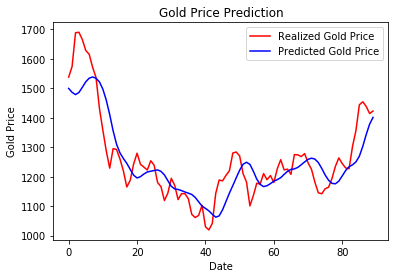

In [74]:
x_test = []
y_test = []

for i in range(16,106):
    x_test.append(inp[i-16:i,0])
    y_test.append(inp[i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

pred_djia_tt = regressorGRU_tre.predict(x_test)


pred_djia_tt = sc_tre.inverse_transform(pred_djia_tt)
y_test = sc_tre.inverse_transform(np.array(y_test).reshape(-1,1))

y_test = y_test + time_trend_ext.reshape(-1,1)[:-16]
pred_djia_tt = pred_djia_tt + time_trend_ext.reshape(-1,1)[:-16]

plot_pred(y_test,pred_djia_tt)

<b> <font size="4"> Here, I add back the time trend after predicting on the test dataset using the estimated model. We can observe that the model prediction on the test dataset improved much better compared to the model prediction made without separating the time trend. We can see that the simple trick of separating the time trend from the time-series data can make a hude difference in terms of the model performance. </font> </b>